# Load libraries :

In [66]:
import keras

In [67]:
import pickle

In [68]:
# Import comet_ml at the top of your file, before sklearn!
from comet_ml import Experiment
import os 
from sklearn.metrics import accuracy_score

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [70]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [71]:
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# EDA :

In [72]:
df = pd.read_csv('featureEng_Train_set1.csv')

CHeking for missing values : 

<AxesSubplot:>

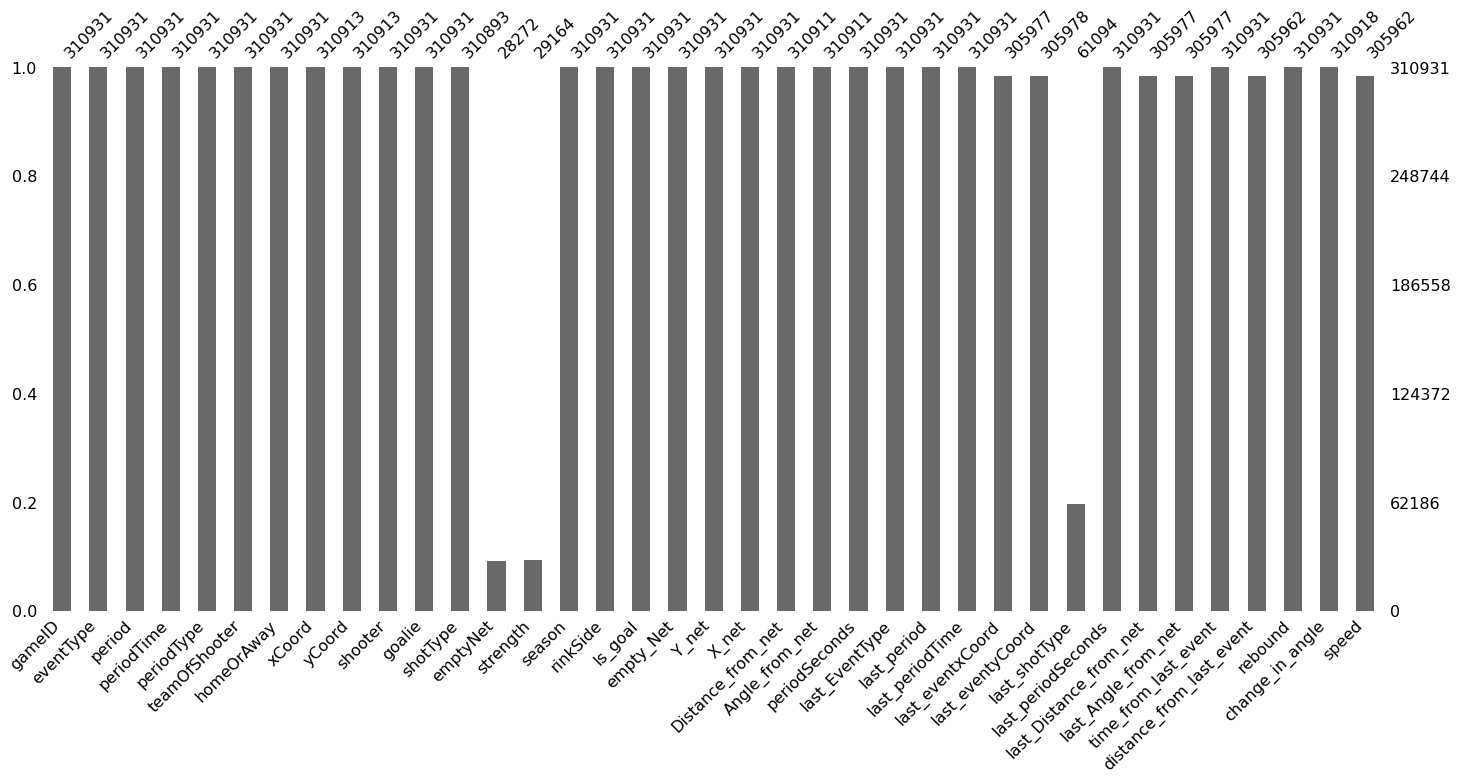

In [73]:
msno.bar(df)

In [74]:
df_1= df[['period','periodType','teamOfShooter','shotType','empty_Net','Distance_from_net','Angle_from_net','time_from_last_event','distance_from_last_event','rebound','change_in_angle','speed','Is_goal']]

In [8]:
df_1.head()

,period,periodType,teamOfShooter,shotType,empty_Net,Distance_from_net,Angle_from_net,time_from_last_event,distance_from_last_event,rebound,change_in_angle,speed,Is_goal
0,1,REGULAR,Toronto Maple Leafs,Wrist Shot,0,34.525353,10.007980,11.0,154.275727,False,0.000000,14.025066,0
1,1,REGULAR,Toronto Maple Leafs,Snap Shot,0,10.000000,0.000000,7.0,50.477718,False,0.000000,7.211103,0
2,1,REGULAR,Toronto Maple Leafs,Snap Shot,0,14.035669,4.085617,1.0,4.123106,True,4.085617,4.123106,0
3,1,REGULAR,Toronto Maple Leafs,Wrist Shot,0,49.517674,46.636577,18.0,79.605276,False,0.000000,4.422515,0
4,1,REGULAR,Toronto Maple Leafs,Tip-In,0,28.017851,2.045408,5.0,22.472205,False,0.000000,4.494441,0


In [75]:
df_1.dropna(inplace = True)

/var/folders/1r/fq72y23n3cx2xktprdq025940000gn/T/ipykernel_24533/1414732027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace = True)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shotType', ylabel='count'>

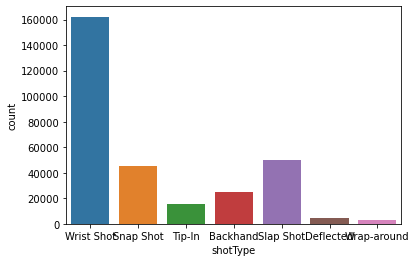

In [76]:
sns.countplot(df_1['shotType'])

Checking correlation between feature :

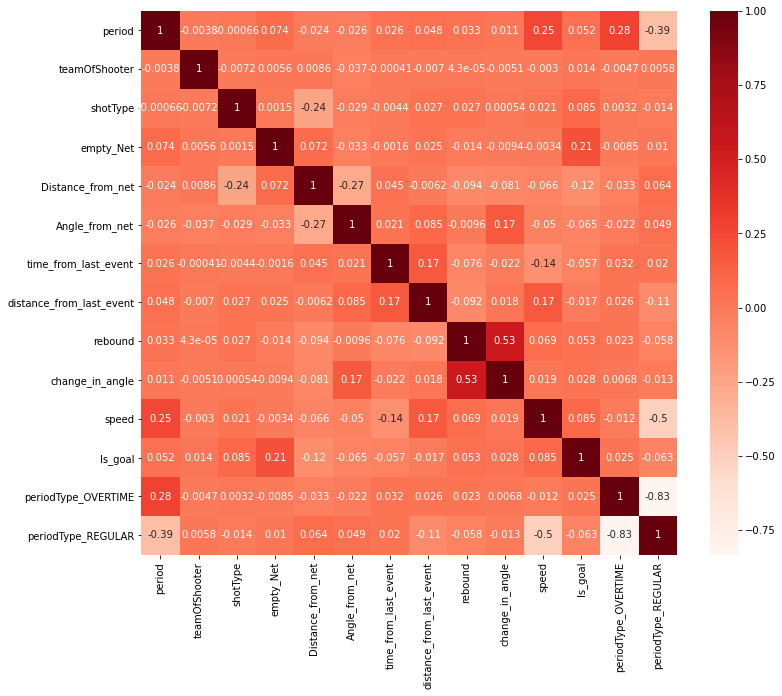

In [99]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Labels distibution :

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_goal', ylabel='count'>

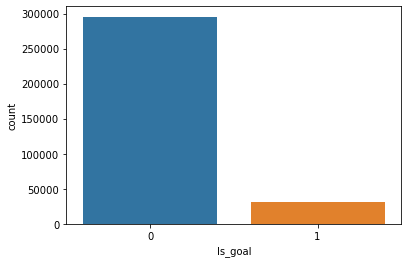

In [12]:
sns.countplot(df_1['Is_goal'])

# Feature encoding :

In [77]:
df_1[['periodType_OVERTIME','periodType_REGULAR','periodType_SHOOTOUT' ]] = pd.get_dummies(df_1[['periodType']])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [78]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
df_1['teamOfShooter'] = encoder.fit_transform(df_1['teamOfShooter'], df_1['Is_goal'])

/var/folders/1r/fq72y23n3cx2xktprdq025940000gn/T/ipykernel_24533/3784376137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['teamOfShooter'] = encoder.fit_transform(df_1['teamOfShooter'], df_1['Is_goal'])


In [79]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder(categories=[['Slap Shot', 'Wrap-around','Wrist Shot','Snap Shot','Backhand','Deflected','Tip-In']])
# transform data
df_1["shotType"] = encoder.fit_transform(df_1[["shotType"]])

/var/folders/1r/fq72y23n3cx2xktprdq025940000gn/T/ipykernel_24533/1748725297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["shotType"] = encoder.fit_transform(df_1[["shotType"]])


In [16]:
df_1

,period,periodType,teamOfShooter,shotType,empty_Net,Distance_from_net,Angle_from_net,time_from_last_event,distance_from_last_event,rebound,change_in_angle,speed,Is_goal,periodType_OVERTIME,periodType_REGULAR,periodType_SHOOTOUT
0,1,REGULAR,0.096319,2.0,0,34.525353,10.007980,11.0,154.275727,False,0.000000,14.025066,0,0,1,0
1,1,REGULAR,0.096319,3.0,0,10.000000,0.000000,7.0,50.477718,False,0.000000,7.211103,0,0,1,0
2,1,REGULAR,0.096319,3.0,0,14.035669,4.085617,1.0,4.123106,True,4.085617,4.123106,0,0,1,0
3,1,REGULAR,0.096319,2.0,0,49.517674,46.636577,18.0,79.605276,False,0.000000,4.422515,0,0,1,0
4,1,REGULAR,0.096319,6.0,0,28.017851,2.045408,5.0,22.472205,False,0.000000,4.494441,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331223,3,REGULAR,0.093039,2.0,0,47.010637,23.838740,7.0,120.353646,False,0.000000,17.193378,0,0,1,0
331224,3,REGULAR,0.092954,3.0,0,13.892444,30.256437,31.0,33.600595,False,0.000000,1.083890,1,0,1,0
331225,3,REGULAR,0.093039,3.0,0,21.189620,19.290046,12.0,36.013886,False,0.000000,3.001157,0,0,1,0
331226,3,REGULAR,0.093039,3.0,0,24.331050,9.462322,4.0,11.704700,True,28.752368,2.926175,0,0,1,0


In [80]:
df_1 =df_1.drop(['periodType','periodType_SHOOTOUT'], axis=1)

In [81]:
df_1['periodType_OVERTIME'] = df_1['periodType_OVERTIME'].astype(int)
df_1['periodType_REGULAR'] = df_1['periodType_REGULAR'].astype(int)

# Feature selection :

[0.02259941 0.21935967 0.03103092 0.04432272 0.14932576 0.12069025
 0.10044486 0.13185504 0.00431422 0.03314684 0.14037342 0.0005776
 0.00195929]


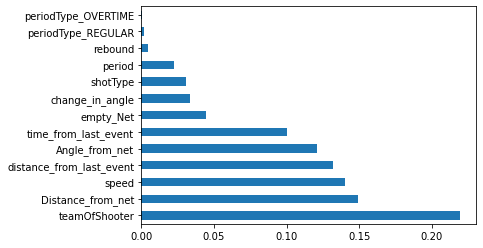

In [181]:
from sklearn.ensemble import ExtraTreesClassifier
X = df_1[['period','teamOfShooter','shotType','empty_Net','Distance_from_net','Angle_from_net','time_from_last_event','distance_from_last_event','rebound','change_in_angle','speed','periodType_OVERTIME','periodType_REGULAR']]
#X = df_1[['period','teamOfShooter','shotType','empty_Net','Distance_from_net','Angle_from_net','time_from_last_event','distance_from_last_event','rebound','change_in_angle','periodType_OVERTIME','periodType_REGULAR']]
y = df_1['Is_goal']   #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [182]:
X = X[['teamOfShooter','shotType','empty_Net','Distance_from_net','Angle_from_net','time_from_last_event','distance_from_last_event','change_in_angle','speed']]


# Data standarisation :

In [183]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values

# Imbalanced data

In [184]:
 df_1['Is_goal'].value_counts()

0    277127
1     28804
Name: Is_goal, dtype: int64

In [185]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# Model training : 

In [186]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [187]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=METRICS)

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X,
                    y,
                    callbacks=[es],
                    epochs=100, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 16)                160       
                                                                 
 dense_40 (Dense)            (None, 16)                272       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
44341/44341 [==============================] - 48s 1ms/step - loss: 0.5564 - tp: 84317.0000 - fp: 51610.0000 - tn: 225517.0000 - fn: 81959.0000 - accuracy: 0.6988 - precision: 0.6203 - recall: 0.5071 - auc: 0.7545 - prc: 0.6458 - val_loss: 0.8174 - val_tp: 53037.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+

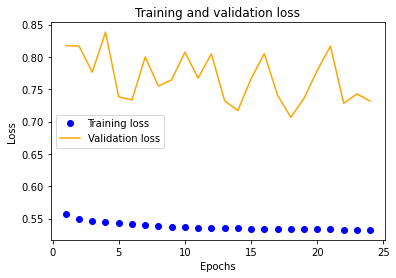

In [188]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

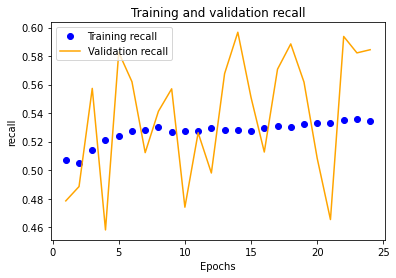

In [192]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['recall'] # you can change this
val_loss_values = history_dict['val_recall'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training recall')
plt.plot(epochs, val_loss_values, 'orange', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()
plt.show()

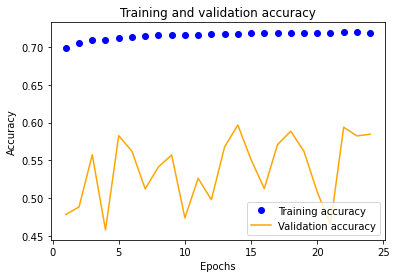

0.5967379808425903

In [189]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [190]:

# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes 
np.round(model.predict(X),0) # 1 and 0 
y # 1 and 0 (survival or not)


preds = np.round(model.predict(X),0)

# confusion matrix
print(confusion_matrix(y, preds))

print(classification_report(y, preds))

17321/17321 [==============================] - 6s 348us/step
[[219451  57676]
 [112699 164428]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72    277127
           1       0.74      0.59      0.66    277127

    accuracy                           0.69    554254
   macro avg       0.70      0.69      0.69    554254
weighted avg       0.70      0.69      0.69    554254



In [222]:
y_proba_val = model.predict(X, verbose=1)

17321/17321 [==============================] - 7s 392us/step


In [223]:
y_proba_val = np.concatenate([y for y in y_proba_val], axis=0)
y_proba_val

array([0.38052407, 0.60579485, 0.73365396, ..., 0.5129218 , 0.41207173,
       0.5690872 ], dtype=float32)

# PLOTS :

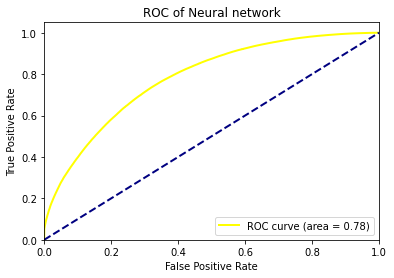

In [203]:
from sklearn.metrics import roc_curve, auc


a, b, _ = roc_curve(y, y_proba_val)
roc_auc_d = auc(a, b)
plt.figure()
plt.plot(
    a,
    b,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_d,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Neural network")
plt.legend(loc="lower right")

plt.savefig('../figures/q71_NN_ROC.png')
plt.show()

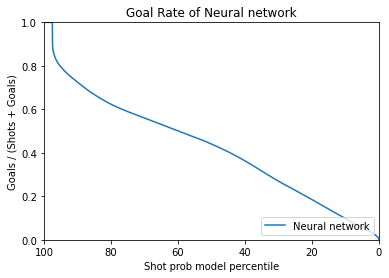

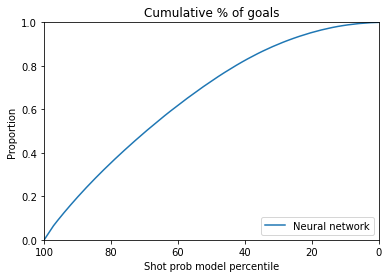

In [217]:
#model percentile
iu = y_proba_val
n = len(iu)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

iu_y = iu[::-1]
iu_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum = np.cumsum(iu_y)


plt.figure()
plt.plot(
    x_axis,
    iu_y,
    label = 'Neural network'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Neural network")
plt.legend(loc="lower right")
plt.savefig('../figures/q71_NN.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis,
    iu_y_sum/sum(iu_y),
    label = 'Neural network'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('../figures/q71_nn_CP.png')
plt.show()

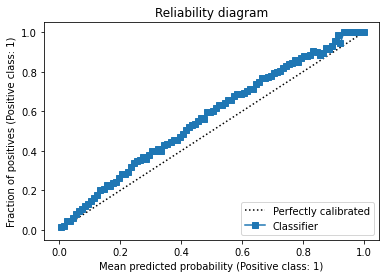

In [224]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_predictions(y, y_proba_val,n_bins=100)
plt.title("Reliability diagram")
plt.savefig('../figures/71_NN_Reliability_diagram.png')
plt.show()

# COMET :

In [191]:
# Create an experiment with your api key
comet_exp6 = Experiment(
    api_key="LgN3RhQfuVAcQnKyC9X0Gk1PC",  
    project_name="ift6758-a22-milestone-2",
    workspace="yasmine",
    log_code=True,
)

# save the model to disk
filename = '../models/TryBestShot_bestmodel.sav'
pickle.dump(model, open(filename, 'wb'))
comet_exp6.log_model("Try best shot6", '../models/TryBestShot_bestmodel.sav')
comet_exp6.log_metric("accuracy", accuracy_score(y, preds))
#these will all get logged
params={'batch_size':10,
        'epochs':27,
        'layer_num':4,
        'optimizer':'adam',
        'patience':10
}
comet_exp6.log_parameters(params)

comet_exp6.log_dataframe_profile(
X, 
name='df_smote',  # keep this name
dataframe_format='csv'  # ensure you set this flag!
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: keras, sklearn, tensorboard, lightgbm, tensorflow. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yasmine/ift6758-a22-milestone-2/21355c4d9aae4381adefa20db7738efe
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7036448992700097
COMET INFO:   Parameters:
COMET INFO:     batch_size : 10
COMET INFO:     epochs     : 27
COMET INFO:     layer_num  : 4
COMET INFO:     optimizer  : adam
COMET INFO:     patience   : 10
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification    

INFO:tensorflow:Assets written to: ram://a603842e-978f-4e7c-a23d-c8eb9ecb8dbc/assets


COMET WARNING: dataframe must be a pandas DataFrame; ignoring
